In [65]:
import math
import numpy as np
import pandas as pd
import sympy as sp
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [66]:
# Read the data
df = pd.read_csv('../uo_nn_batch_123456-789101.csv', sep=';')
# drop the last column
df = df.drop(df.columns[-1], axis=1)
df.head()

,num_target,la,isd,niter,tex,tr_acc,te_acc,L*,Gconv
0,1,0.00,1,75,0.2452,100.0,100.0,5.720000e-07,1
1,1,0.00,3,6,0.0204,100.0,100.0,2.910000e-50,1
2,1,0.00,7,125125,2.3691,100.0,100.0,1.410000e-05,0
3,1,0.01,1,58,0.2158,100.0,100.0,2.760000e-02,1
4,1,0.01,3,45,0.1756,100.0,100.0,2.760000e-02,1


In [67]:
# show the name of the columns
df.columns

Index(['num_target', '      la', ' isd', '  niter', '     tex', ' tr_acc',
       ' te_acc', '        L*', '   Gconv'],
      dtype='object')

In [68]:
# transform the la and isd columns to a categorical column
df['      la'] = df['      la'].astype('category')
df[' isd'] = df[' isd'].astype('category')


# GM

In [69]:
# select only the rows with 'isd' = 1
df_gm = df[df[' isd'] == 1]
df_gm.head()

,num_target,la,isd,niter,tex,tr_acc,te_acc,L*,Gconv
0,1,0.00,1,75,0.2452,100.0,100.0,5.720000e-07,1
3,1,0.01,1,58,0.2158,100.0,100.0,2.760000e-02,1
6,1,0.10,1,23,0.0902,100.0,100.0,9.710000e-02,1
9,2,0.00,1,385,1.0722,100.0,98.8,1.260000e-06,1
12,2,0.01,1,139,0.4294,99.6,98.8,5.150000e-02,1


In [70]:
df_gm_la1 = df_gm.loc[(df_gm['      la'] == 0.00) & (df_gm['   Gconv'] == 1)]
df_gm_la2 = df_gm.loc[(df_gm['      la'] == 0.01) & (df_gm['   Gconv'] == 1)]
df_gm_la3 = df_gm.loc[(df_gm['      la'] == 0.1) & (df_gm['   Gconv'] == 1)]

pr1 = len(df_gm_la1)/10 * 100
pr2 = len(df_gm_la2)/10 * 100
pr3 = len(df_gm_la3)/10 * 100

In [71]:
la_gm_conv_prc = pd.DataFrame({'lambda': ['0.00', '0.01', '0.1'], 'percentage': [pr1, pr2, pr3]})
la_gm_conv_prc

,lambda,percentage
0,0.00,70.0
1,0.01,100.0
2,0.1,100.0


<AxesSubplot:title={'center':'GM convergence rate for different values of lambda'}, xlabel='lambda'>

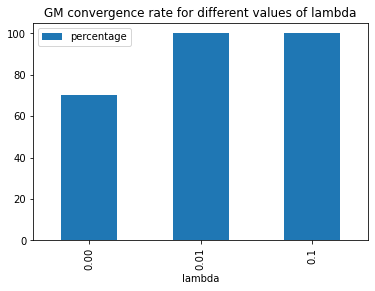

In [72]:
# plot of la_gm_conv_prc
la_gm_conv_prc.plot(x='lambda', y='percentage',
                    kind='bar',
                    title='GM convergence rate for different values of lambda')

In [73]:
fig = px.bar(la_gm_conv_prc, x='lambda', y='percentage',
             title='GM convergence percentage for different values of lambda',
             color='lambda',
             color_discrete_sequence =['#440154', '#3b528b', '#2c728e'],
             height=800, width=1200)
fig.update_layout(
    xaxis_title=r'lambda (regularization parameter)',
    yaxis_title=r'GM convergence percentage (%)'
)
fig.show()

## L as a function of la

In [74]:
# transform the la column to a categorical column
df_gm['      la'] = df_gm['      la'].astype('category')

# plot a scatter plot of L* as a function of la
fig = px.scatter(df_gm, x='      la', y='        L*',
                    title='GM Loss function for the optimal weights as a function of lambda',
                    color='      la',
                    color_discrete_sequence =['#440154', '#3b528b', '#2c728e'])
fig.update_layout(
    xaxis_title=r'lambda (regularization parameter)',
    yaxis_title=r'$L(w*,Xtr,ytr)$',
    xaxis_type='category'
)
fig.show()

C:\Users\jpniz\AppData\Local\Temp\ipykernel_16376\3572690473.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# QNM

In [75]:
# select only the rows with 'isd' = 1
df_qnm = df[df[' isd'] == 3]
df_qnm.head()

,num_target,la,isd,niter,tex,tr_acc,te_acc,L*,Gconv
1,1,0.00,3,6,0.0204,100.0,100.0,2.910000e-50,1
4,1,0.01,3,45,0.1756,100.0,100.0,2.760000e-02,1
7,1,0.10,3,18,0.0893,100.0,100.0,9.710000e-02,1
10,2,0.00,3,50,0.1685,100.0,98.8,1.660000e-11,1
13,2,0.01,3,50,0.1905,99.6,98.8,5.150000e-02,1


In [76]:
df_qnm_la1 = df_qnm.loc[(df_qnm['      la'] == 0.00) & (df_qnm['   Gconv'] == 1)]
df_qnm_la2 = df_qnm.loc[(df_qnm['      la'] == 0.01) & (df_qnm['   Gconv'] == 1)]
df_qnm_la3 = df_qnm.loc[(df_qnm['      la'] == 0.1) & (df_qnm['   Gconv'] == 1)]

pr1 = len(df_qnm_la1)/10 * 100
pr2 = len(df_qnm_la2)/10 * 100
pr3 = len(df_qnm_la3)/10 * 100

In [77]:
la_qnm_conv_prc = pd.DataFrame({'lambda': ['0.00', '0.01', '0.1'], 'percentage': [pr1, pr2, pr3]})
la_qnm_conv_prc

,lambda,percentage
0,0.00,80.0
1,0.01,100.0
2,0.1,100.0


<AxesSubplot:title={'center':'QNM convergence rate for different values of lambda'}, xlabel='lambda'>

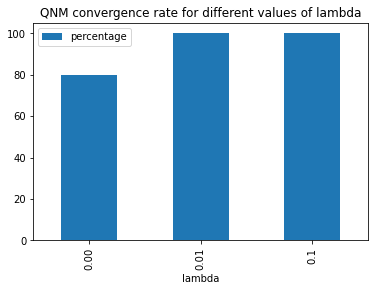

In [78]:
# plot of la_gm_conv_prc
la_qnm_conv_prc.plot(x='lambda', y='percentage',
                    kind='bar',
                    title='QNM convergence rate for different values of lambda')

In [79]:
fig = px.bar(la_qnm_conv_prc, x='lambda', y='percentage',
             title='GM convergence percentage for different values of lambda',
             color='lambda',
             color_discrete_sequence =['#440154', '#3b528b', '#2c728e'],
             height=800, width=1200)
fig.update_layout(
    xaxis_title=r'lambda (regularization parameter)',
    yaxis_title=r'QNM convergence percentage (%)'
)
fig.show()

## L as a function of la

In [80]:
# transform the la column to a categorical column
df_qnm['      la'] = df_qnm['      la'].astype('category')

# plot a scatter plot of L* as a function of la
fig = px.scatter(df_qnm, x='      la', y='        L*',
                    title='GM Loss function for the optimal weights as a function of lambda',
                    color='      la',
                    color_discrete_sequence =['#440154', '#3b528b', '#2c728e'])
fig.update_layout(
    xaxis_title=r'lambda (regularization parameter)',
    yaxis_title=r'$L(w*,Xtr,ytr)$',
    xaxis_type='category'
)
fig.show()

C:\Users\jpniz\AppData\Local\Temp\ipykernel_16376\2453681148.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# SGM

In [81]:
# select only the rows with 'isd' = 1
df_sgm = df[df[' isd'] == 7]
df_sgm.head()

,num_target,la,isd,niter,tex,tr_acc,te_acc,L*,Gconv
2,1,0.00,7,125125,2.3691,100.0,100.0,0.000014,0
5,1,0.01,7,3750,0.0578,100.0,100.0,0.031400,0
8,1,0.10,7,3750,0.0585,53.6,89.6,0.200000,0
11,2,0.00,7,1625,0.0222,100.0,99.2,0.002710,0
14,2,0.01,7,1500,0.0212,95.2,99.2,0.090300,0


In [82]:
df_sgm_la1 = df_sgm.loc[(df_sgm['      la'] == 0.00) & (df_sgm['   Gconv'] == 1)]
df_sgm_la2 = df_sgm.loc[(df_sgm['      la'] == 0.01) & (df_sgm['   Gconv'] == 1)]
df_sgm_la3 = df_sgm.loc[(df_sgm['      la'] == 0.1) & (df_sgm['   Gconv'] == 1)]

pr1 = len(df_sgm_la1)/10 * 100
pr2 = len(df_sgm_la2)/10 * 100
pr3 = len(df_sgm_la3)/10 * 100

In [83]:
la_sgm_conv_prc = pd.DataFrame({'lambda': ['0.00', '0.01', '0.1'], 'percentage': [pr1, pr2, pr3]})
la_sgm_conv_prc

,lambda,percentage
0,0.00,0.0
1,0.01,0.0
2,0.1,0.0


<AxesSubplot:title={'center':'SGM convergence rate for different values of lambda'}, xlabel='lambda'>

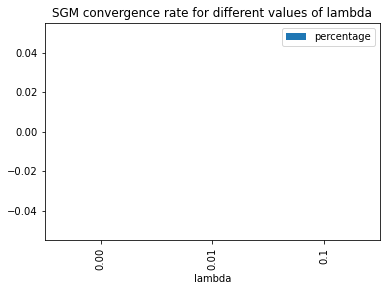

In [84]:
la_sgm_conv_prc.plot(x='lambda', y='percentage',
                    kind='bar',
                    title='SGM convergence rate for different values of lambda')

In [85]:
fig = px.bar(la_sgm_conv_prc, x='lambda', y='percentage',
             title='GM convergence percentage for different values of lambda',
             color='lambda',
             color_discrete_sequence =['#440154', '#3b528b', '#2c728e'],
             height=800, width=1200)
fig.update_layout(
    xaxis_title=r'lambda (regularization parameter)',
    yaxis_title=r'SGM convergence percentage (%)'
)
fig.show()

## L as a function of la

In [86]:
pip install miktex

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement miktex (from versions: none)
ERROR: No matching distribution found for miktex


In [87]:
# transform the la column to a categorical column
df_sgm['      la'] = df_sgm['      la'].astype('category')

# plot a scatter plot of L* as a function of la
fig = px.scatter(df_sgm, x='      la', y='        L*',
                    title='GM Loss function for the optimal weights as a function of lambda',
                    color='      la',
                    color_discrete_sequence =['#440154', '#3b528b', '#2c728e'])
fig.update_layout(
    xaxis_title=r'lambda (regularization parameter)',
    yaxis_title=r'$L(w*,Xtr,ytr)$',
    xaxis_type='category'
)
fig.show()

C:\Users\jpniz\AppData\Local\Temp\ipykernel_16376\656784478.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Global convergence as a function of la and isd

In [88]:
# https://github.com/serge-tochilov/barchart3d-plotly/blob/master/barchart3d.py
def barchart3d(labels, z_data, title, z_title,
               n_row=0, width=900, height=900, thikness=0.7, colorscale='Viridis',
               **kwargs):
    """
    Draws a 3D barchart
    :param labels: Array_like of bar labels
    :param z_data: Array_like of bar heights (data coords)
    :param title: Chart title
    :param z_title: Z-axis title
    :param n_row: Number of x-rows
    :param width: Chart width (px)
    :param height: Chart height (px)
    :param thikness: Bar thikness (0; 1)
    :param colorscale: Barchart colorscale
    :param **kwargs: Passed to Mesh3d()
    :return: 3D barchart figure
    """

    if n_row < 1:
        n_row = math.ceil(math.sqrt(len(z_data)))
    thikness *= 0.5
    ann = []
    
    fig = go.Figure()

    for iz, z_max in enumerate(z_data):
        x_cnt, y_cnt = iz % n_row, iz // n_row
        x_min, y_min = x_cnt - thikness, y_cnt - thikness
        x_max, y_max = x_cnt + thikness, y_cnt + thikness

        fig.add_trace(go.Mesh3d(
            x=[x_min, x_min, x_max, x_max, x_min, x_min, x_max, x_max],
            y=[y_min, y_max, y_max, y_min, y_min, y_max, y_max, y_min],
            z=[0, 0, 0, 0, z_max, z_max, z_max, z_max],
            alphahull=0,
            intensity=[0, 0, 0, 0, z_max, z_max, z_max, z_max],
            coloraxis='coloraxis',
            hoverinfo='skip',
            **kwargs))

        ann.append(dict(
            showarrow=False,
            x=x_cnt, y=y_cnt, z=z_max,
            text=f'<b>{labels[iz]}</b>',
            font=dict(color='white', size=11),
            bgcolor='rgba(0, 0, 0, 0.3)',
            xanchor='center', yanchor='middle',
            hovertext=f'{z_max} {labels[iz]}'))

    fig.update_layout(
        width=width, height=height,
        title=title, title_x=0.5,
        scene=dict(
            xaxis=dict(showticklabels=False, title=''),
            yaxis=dict(showticklabels=False, title=''),
            zaxis=dict(title=z_title),
            annotations=ann),
        coloraxis=dict(
            colorscale=colorscale,
            colorbar=dict(
                title=dict(
                    text=z_title,
                    side='right'),
                xanchor='right', x=1.0,
                xpad=0,
                ticks='inside')),
        legend=dict(
            yanchor='top', y=1.0,
            xanchor='left', x=0.0,
            bgcolor='rgba(0, 0, 0, 0)',
            itemclick=False,
            itemdoubleclick=False),
        showlegend=True)
    return fig

In [89]:
df_la1_gm = df.loc[(df['      la'] == 0.00) & (df['   Gconv'] == 1) & (df[' isd'] == 1)]
df_la2_gm = df.loc[(df['      la'] == 0.01) & (df['   Gconv'] == 1) & (df[' isd'] == 1)]
df_la3_gm = df.loc[(df['      la'] == 0.1) & (df['   Gconv'] == 1) & (df[' isd'] == 1)]

df_la1_qnm = df.loc[(df['      la'] == 0.00) & (df['   Gconv'] == 1) & (df[' isd'] == 3)]
df_la2_qnm = df.loc[(df['      la'] == 0.01) & (df['   Gconv'] == 1) & (df[' isd'] == 3)]
df_la3_qnm = df.loc[(df['      la'] == 0.1) & (df['   Gconv'] == 1) & (df[' isd'] == 3)]

df_la1_sgm = df.loc[(df['      la'] == 0.00) & (df['   Gconv'] == 1) & (df[' isd'] == 7)]
df_la2_sgm = df.loc[(df['      la'] == 0.01) & (df['   Gconv'] == 1) & (df[' isd'] == 7)]
df_la3_sgm = df.loc[(df['      la'] == 0.1) & (df['   Gconv'] == 1) & (df[' isd'] == 7)]


pr1_gm = len(df_la1_gm)/10 * 100
pr2_gm = len(df_la2_gm)/10 * 100
pr3_gm = len(df_la3_gm)/10 * 100

pr1_qnm = len(df_la1_qnm)/10 * 100
pr2_qnm = len(df_la2_qnm)/10 * 100
pr3_qnm = len(df_la3_qnm)/10 * 100

pr1_sgm = len(df_la1_sgm)/10 * 100
pr2_sgm = len(df_la2_sgm)/10 * 100
pr3_sgm = len(df_la3_sgm)/10 * 100

In [90]:
la_isd_conv_prc = [pr1_gm, pr2_gm, pr3_gm, pr1_qnm, pr2_qnm, pr3_qnm, pr1_sgm, pr2_sgm, pr3_sgm]
label = ['GM-0.00', 'GM-0.01', 'GM-0.1', 'QNM-0.00', 'QNM-0.01', 'QNM-0.1', 'SGM-0.00', 'SGM-0.01', 'SGM-0.1']

In [91]:
fig = barchart3d(
    label, la_isd_conv_prc,
    'Convergence percentage for all algorithm-lambda combinations', 'Percentage',
    colorscale='Viridis', opacity=0.6, flatshading=True)
fig.show()

In [92]:
# plot a scatter plot of L* as a function of la
fig = px.scatter(df, x='      la', y='        L*',
                    title='GM Loss function for the optimal weights as a function of lambda',
                    color=' isd',
                    color_discrete_sequence =['#440154', '#3b528b', '#2c728e'])
fig.update_layout(
    xaxis_title=r'lambda (regularization parameter)',
    yaxis_title=r'$L(w*,Xtr,ytr)$',
    xaxis_type='category'
)
fig.show()

In [93]:
df2 = df

# convert to string isd and la columns
df2[' isd'] = df2[' isd'].astype(str)
df2['      la'] = df2['      la'].astype(str)

# change the values of isd and la columns
df2[' isd'] = df2[' isd'].replace({'1': 'GM', '3': 'QNM', '7': 'SGM'})

df2["algorithm-lambda"] = df2[[" isd", "      la"]].apply("-".join, axis=1)
df2.head()

,num_target,la,isd,niter,tex,tr_acc,te_acc,L*,Gconv,algorithm-lambda
0,1,0.0,GM,75,0.2452,100.0,100.0,5.720000e-07,1,GM-0.0
1,1,0.0,QNM,6,0.0204,100.0,100.0,2.910000e-50,1,QNM-0.0
2,1,0.0,SGM,125125,2.3691,100.0,100.0,1.410000e-05,0,SGM-0.0
3,1,0.01,GM,58,0.2158,100.0,100.0,2.760000e-02,1,GM-0.01
4,1,0.01,QNM,45,0.1756,100.0,100.0,2.760000e-02,1,QNM-0.01


In [94]:
# plot a scatter plot of L* as a function of la
fig = px.scatter(df, x='algorithm-lambda', y='        L*',
                    title='GM Loss function for the optimal weights as a function of the algorithm and lambda combination',
                    color='algorithm-lambda',
                    color_discrete_sequence =['#440154', '#472d7b', '#3b528b', '#2c728e', '#21918c', '#28ae80', '#5ec962', '#addc30', '#fde725'])
fig.update_layout(
    xaxis_title=r'lambda (regularization parameter)',
    yaxis_title=r'$L(w*,Xtr,ytr)$',
    xaxis_type='category'
)
fig.show()

lambda = 0 da muy buena minimizacion de la loss function.